In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
import os
import shutil

source_directories = [
      '/content/drive/MyDrive/Brain Tumor/no',
      '/content/drive/MyDrive/Brain Tumor/yes',
      '/content/drive/MyDrive/Brain Tumor/brain_tumor_dataset/no',
      '/content/drive/MyDrive/Brain Tumor/brain_tumor_dataset/yes'
]

destination_directory = '/content/Temp'

# Create destination directories if they don't exist
os.makedirs(os.path.join(destination_directory, 'no'), exist_ok=True)
os.makedirs(os.path.join(destination_directory, 'yes'), exist_ok=True)

# Iterate through source directories
for source_dir in source_directories:
    category = 'no' if 'no' in source_dir else 'yes'
    files = os.listdir(source_dir)

    for file in files:
        source_path = os.path.join(source_dir, file)
        destination_path = os.path.join(destination_directory, category, file)

        shutil.copy(source_path, destination_path)
#         print(f"Copied {file} to {destination_path}")

print("File copying completed.")


File copying completed.


In [5]:
#import os
#import shutil

#source_directories = [
   # '/content/drive/MyDrive/Brain Tumor/no',
    #'/content/drive/MyDrive/Brain Tumor/yes',
    #'/content/drive/MyDrive/Brain Tumor/brain_tumor_dataset/no',
    #'/content/drive/MyDrive/Brain Tumor/brain_tumor_dataset/yes'
#]

#destination_directory = '/content/Temp'

# Create destination directories if they don't exist
#os.makedirs(os.path.join(destination_directory, 'no'), exist_ok=True)
#os.makedirs(os.path.join(destination_directory, 'yes'), exist_ok=True)

# Iterate through source directories
#for source_dir in source_directories:
    #category = 'no' if 'no' in source_dir else 'yes'
    #files = os.listdir(source_dir)

    #for file in files:
        #source_path = os.path.join(source_dir, file)
        #destination_path = os.path.join(destination_directory, category, file)

        #shutil.copy(source_path, destination_path)
#         print(f"Copied {file} to {destination_path}")

#print("File copying completed.")


In [6]:
data_dir = "/content/Temp"
data_dir = pathlib.Path(data_dir).with_suffix('')

In [7]:
image_count = len(list(data_dir.glob('*/*.*')))
print(image_count)

253


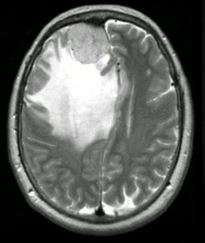

In [8]:
yes = list(data_dir.glob('yes/*'))
PIL.Image.open(str(yes[0]))

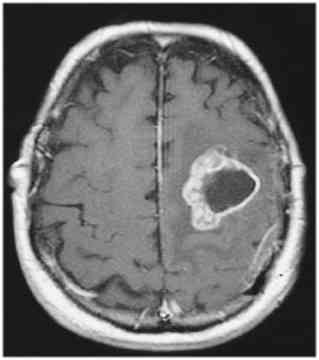

In [9]:
PIL.Image.open(str(yes[1]))

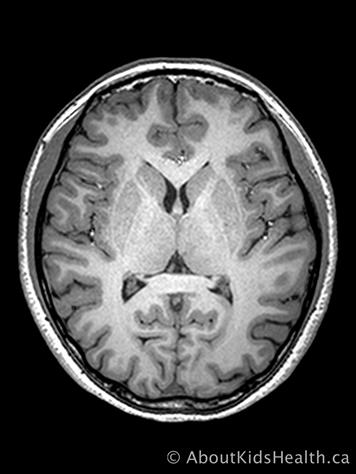

In [10]:
no = list(data_dir.glob('no/*'))
PIL.Image.open(str(no[1]))


In [11]:
batch_size = 32
img_height = 244
img_width = 244

In [12]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# def load_and_preprocess_image(img_path):
#     # Load image and resize to the desired dimensions
#     img = load_img(img_path, target_size=(img_height, img_width))
#     # Convert image to numpy array and preprocess
#     img_array = img_to_array(img)
#     img_array /= 255.0  # Normalize pixel values between 0 and 1
#     return img_array


In [13]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import os
# import shutil

# # Create an ImageDataGenerator for data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Augment and copy images to their corresponding class folders
# for class_name in os.listdir(data_dir):
#     class_dir = os.path.join(data_dir, class_name)
#     augmented_class_dir = os.path.join(class_dir, "augmented")
#     os.makedirs(augmented_class_dir, exist_ok=True)

#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = load_and_preprocess_image(img_path)  # Load and preprocess the image
#         img = img.reshape((1,) + img.shape)  # Reshape to (1, height, width, channels)

#         # Generate augmented images
#         for idx, batch in enumerate(datagen.flow(img, batch_size=1)):
#             augmented_img = batch[0]
#             augmented_img_name = f"{img_name.split('.')[0]}_{idx}.jpg"  # Add index to filename
#             augmented_img_path = os.path.join(augmented_class_dir, augmented_img_name)
#             # Save augmented image using shutil.copy
#             shutil.copy(img_path, augmented_img_path)

# # Now you have augmented images combined with original images in their corresponding class folders
# num_original_images = len(os.listdir(os.path.join(data_dir, 'no'))) + len(os.listdir(os.path.join(data_dir, 'yes')))
# num_augmented_images = len(os.listdir(os.path.join(augmented_dir, 'no'))) + len(os.listdir(os.path.join(augmented_dir, 'yes')))
# total_images = num_original_images + num_augmented_images

# print("Number of original images:", num_original_images)
# print("Number of augmented images:", num_augmented_images)
# print("Total number of images after augmentation:", total_images)

# !rm -r /kaggle/temp/augmented

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 253 files belonging to 2 classes.
Using 203 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [16]:
class_names = train_ds.class_names
print("Class names:", class_names)

Class names: ['no', 'yes']


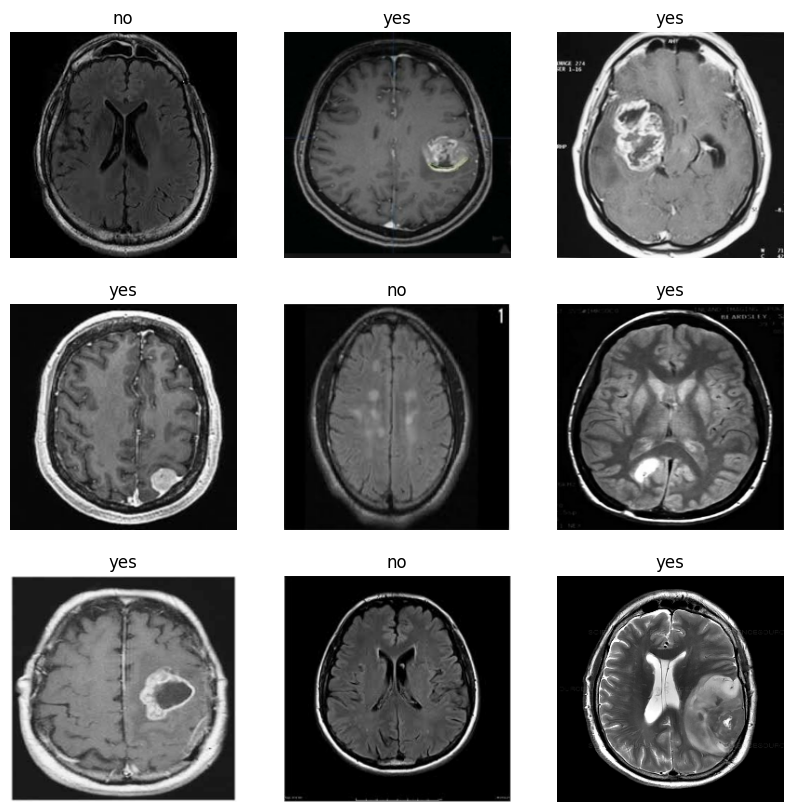

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [18]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 244, 244, 3)
(32,)


In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

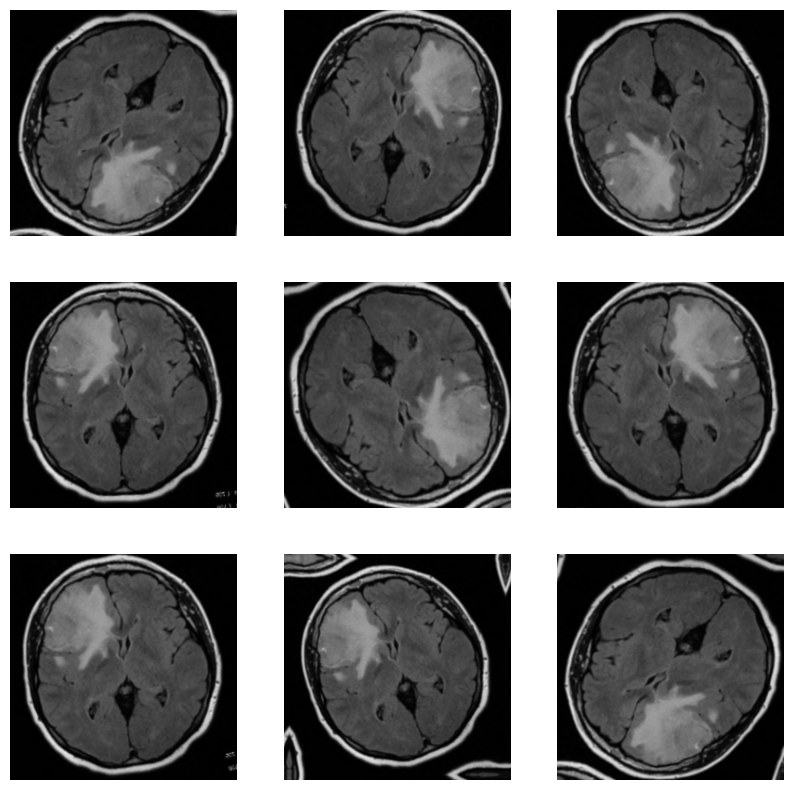

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip(),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [21]:
from tensorflow.keras import Sequential, layers

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(64, (4,4), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(48, (4,4), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(24, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
import time
from tensorflow.keras.callbacks import EarlyStopping

epochs = 100

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start_time = time.time()


history1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)

end_time = time.time()

# Calculate inference time per epoch
inference_time_per_epoch = (end_time - start_time) / epochs

# Get the best epoch
best_epoch = early_stopping.stopped_epoch + 1  # Adding 1 as epoch count starts from 0

# Get training and validation metrics at the best epoch
best_train_accuracy = history1.history['accuracy'][best_epoch - 1]
best_val_accuracy = history1.history['val_accuracy'][best_epoch - 1]
best_train_loss = history1.history['loss'][best_epoch - 1]
best_val_loss = history1.history['val_loss'][best_epoch - 1]

print("Best Epoch:", best_epoch)
print("Best Training Accuracy:", best_train_accuracy)
print("Best Validation Accuracy:", best_val_accuracy)
print("Best Training Loss:", best_train_loss)
print("Best Validation Loss:", best_val_loss)
print("Inference Time per Epoch:", inference_time_per_epoch, "seconds")


Epoch 1/100
7/7 [==============================] - 12s 483ms/step - loss: 0.6488 - accuracy: 0.5665 - val_loss: 0.6233 - val_accuracy: 0.7600
Epoch 2/100
7/7 [==============================] - 1s 157ms/step - loss: 0.5512 - accuracy: 0.7291 - val_loss: 0.6782 - val_accuracy: 0.7800
Epoch 3/100
7/7 [==============================] - 1s 172ms/step - loss: 0.5054 - accuracy: 0.7685 - val_loss: 0.5845 - val_accuracy: 0.7800
Epoch 4/100
7/7 [==============================] - 1s 155ms/step - loss: 0.5317 - accuracy: 0.7635 - val_loss: 0.5526 - val_accuracy: 0.7800
Epoch 5/100
7/7 [==============================] - 1s 156ms/step - loss: 0.5129 - accuracy: 0.7586 - val_loss: 0.5395 - val_accuracy: 0.8000
Epoch 6/100
7/7 [==============================] - 1s 157ms/step - loss: 0.5360 - accuracy: 0.7389 - val_loss: 0.5512 - val_accuracy: 0.7800
Epoch 7/100
7/7 [==============================] - 1s 157ms/step - loss: 0.4843 - accuracy: 0.7833 - val_loss: 0.5609 - val_accuracy: 0.7800
Epoch 8/100


In [24]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 244, 244, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 244, 244, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 244, 244, 64)      3136      
                                                                 
 max_pooling2d (MaxPooling2  (None, 122, 122, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 48)      49200     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 48)        0         
 g2D)                                                 

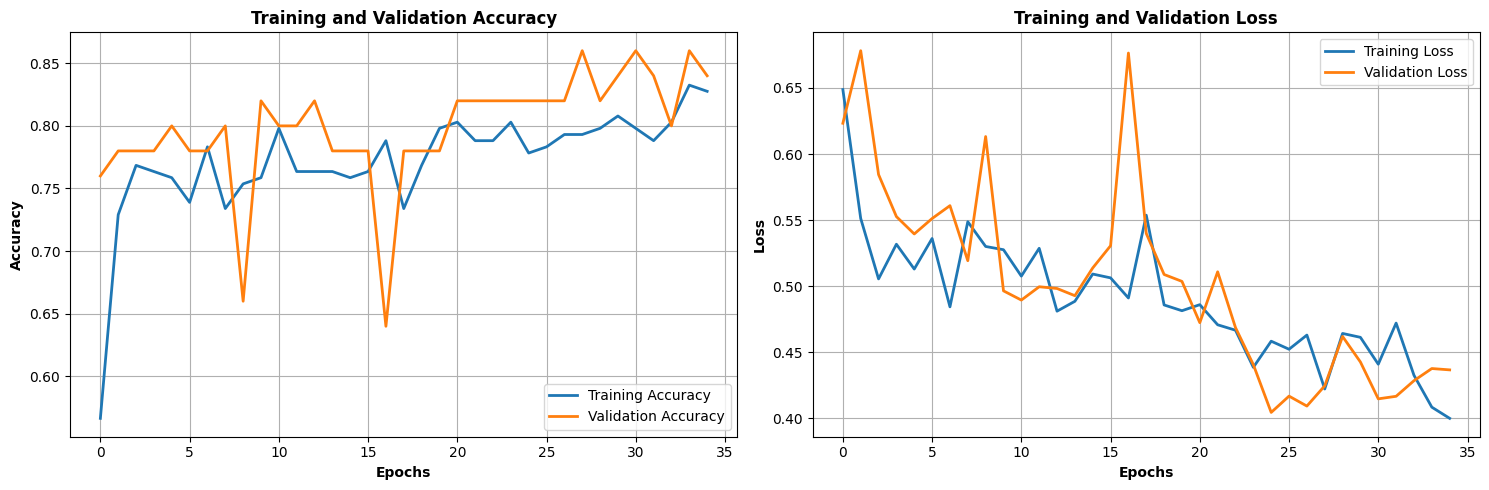

In [25]:
import matplotlib.pyplot as plt

# Example colors that are complementary and visually pleasing
color1 = '#1f77b4'  # Blue
color2 = '#ff7f0e'  # Orange

# Accuracy and loss data
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range = range(epochs)

# Set up the figure and subplots
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

# Plot training and validation accuracy
plt.plot(acc, label='Training Accuracy', color=color1, linewidth=2)
plt.plot(val_acc, label='Validation Accuracy', color=color2, linewidth=2)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy', fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

# Plot training and validation loss
plt.plot(loss, label='Training Loss', color=color1, linewidth=2)
plt.plot(val_loss, label='Validation Loss', color=color2, linewidth=2)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss', fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.grid(True)

plt.tight_layout()
plt.show()


In [26]:
from sklearn.metrics import classification_report

# Generate predictions on the validation dataset
val_predictions = model.predict(val_ds)

# Get true labels for validation dataset
val_true_labels = []
for images, labels in val_ds:
    val_true_labels.extend(labels.numpy())

val_true_labels = np.array(val_true_labels)

# Calculate predicted labels for validation dataset
val_predicted_labels = np.argmax(val_predictions, axis=1)

# Generate the classification report
print(classification_report(val_true_labels, val_predicted_labels, target_names=class_names))

2/2 [==============================] - 0s 21ms/step
              precision    recall  f1-score   support

          no       0.85      0.61      0.71        18
         yes       0.81      0.94      0.87        32

    accuracy                           0.82        50
   macro avg       0.83      0.77      0.79        50
weighted avg       0.82      0.82      0.81        50



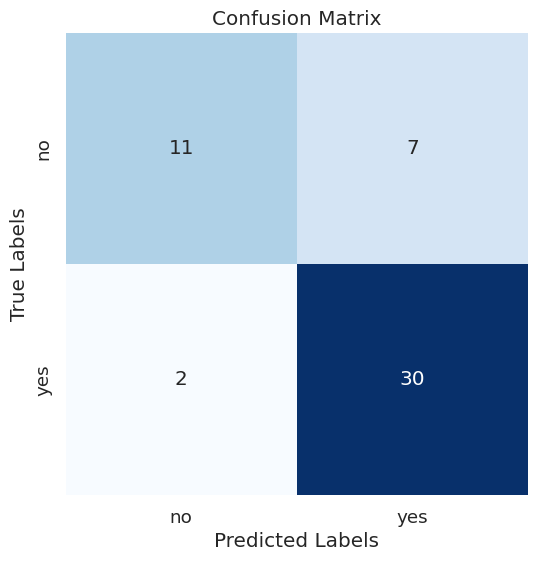

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(val_true_labels, val_predicted_labels)

# Set up the figure and axis for confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 356ms/step
Actual Label: yes
Predicted Label: yes
Confidence Level: 1.7191476


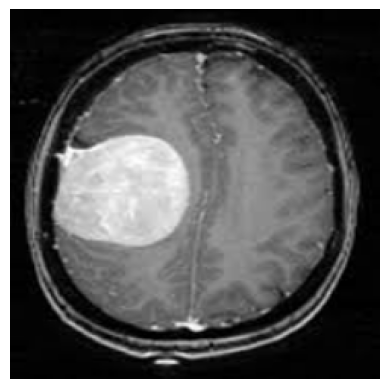

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to display the prediction for a given validation image
def show_prediction(validation_image, actual_label):
    # Reshape the image to match the model's expected shape
    img = image.img_to_array(validation_image)
    img = np.expand_dims(img, axis=0)

    # Make a prediction
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    # Get the confidence level
    confidence_level = np.max(prediction)

    # Display the actual and predicted labels along with confidence level
    print("Actual Label:", class_names[actual_label])
    print("Predicted Label:", class_names[predicted_label])
    print("Confidence Level:", confidence_level)

    # Display the image
    plt.imshow(validation_image.numpy().astype("uint8"))
    plt.axis('off')
    plt.show()

# Choose a random index
random_index = np.random.randint(len(val_ds))

# Take a single sample from the validation dataset
validation_sample = val_ds.take(random_index)

# Unpack the sample into image and label
for images, labels in validation_sample:
    validation_image = images[0]
    actual_label = labels.numpy()[0]

# Show the prediction for the chosen image
show_prediction(validation_image, actual_label)


In [30]:
# Get true labels for validation dataset
train_true_labels = []
for images, labels in train_ds:
    train_true_labels.extend(labels.numpy())

train_true_labels = np.array(train_true_labels)

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import clone

# Convert CNN predictions to features
cnn_train_features = model.predict(train_ds)
cnn_val_features = model.predict(val_ds)

# Flatten the CNN features
cnn_train_features_flat = cnn_train_features.reshape(cnn_train_features.shape[0], -1)
cnn_val_features_flat = cnn_val_features.reshape(cnn_val_features.shape[0], -1)


2/2 [==============================] - 0s 24ms/step


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define RandomForest model with adjusted hyperparameters
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train RandomForest on CNN features
rf_model.fit(cnn_train_features_flat, train_true_labels)

# Make predictions on the validation set
rf_predictions = rf_model.predict(cnn_train_features_flat)

# Evaluate RandomForest accuracy
rf_accuracy = accuracy_score(train_true_labels, rf_predictions)
print("RandomForest Accuracy:", rf_accuracy)


RandomForest Accuracy: 0.9605911330049262
